# 1. Install Dependencies and Setup

In [8]:
pip install tensorflow opencv-python matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [9]:
!pip list

Package                 Version
----------------------- -----------
absl-py                 2.3.1
asttokens               3.0.1
astunparse              1.6.3
certifi                 2026.1.4
charset-normalizer      3.4.4
colorama                0.4.6
comm                    0.2.3
contourpy               1.3.3
cycler                  0.12.1
debugpy                 1.8.19
decorator               5.2.1
executing               2.2.1
flatbuffers             25.12.19
fonttools               4.61.1
gast                    0.7.0
google-pasta            0.2.0
grpcio                  1.76.0
h5py                    3.15.1
idna                    3.11
ipykernel               7.1.0
ipython                 9.9.0
ipython_pygments_lexers 1.1.1
jedi                    0.19.2
jupyter_client          8.8.0
jupyter_core            5.9.1
keras                   3.13.0
kiwisolver              1.4.9
libclang                18.1.1
Markdown                3.10
markdown-it-py          4.0.0
MarkupSafe          

In [10]:
import tensorflow as tf
import os

In [11]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [12]:
tf.config.list_physical_devices('GPU')

[]

# 2. Remove dodgy images

In [13]:
import cv2
import imghdr

C:\Users\kshlo\AppData\Local\Temp\ipykernel_14632\4232469594.py:2: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [14]:
data_dir = 'data' 

In [15]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [16]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

# 3. Load Data

In [87]:
import numpy as np
from matplotlib import pyplot as plt

In [88]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 305 files belonging to 2 classes.


In [89]:
data_iterator = data.as_numpy_iterator()

In [90]:
batch = data_iterator.next()

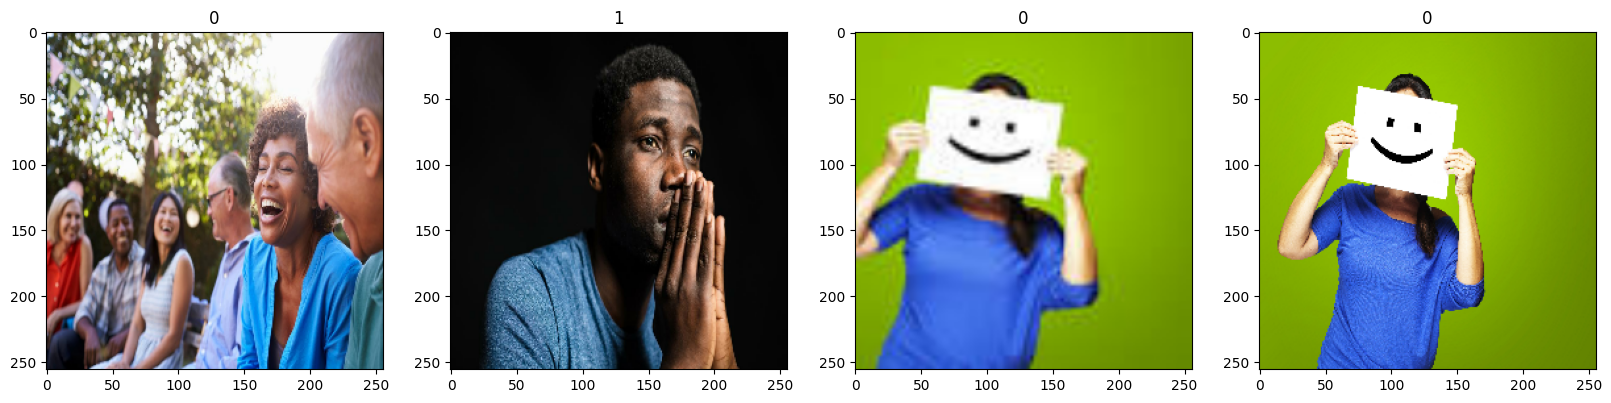

In [91]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# 4. Scale Data

In [92]:
data = data.map(lambda x,y: (x/255, y))

In [93]:
data.as_numpy_iterator().next()

(array([[[[0.79607844, 0.7882353 , 0.8       ],
          [0.79607844, 0.7882353 , 0.8       ],
          [0.79607844, 0.7882353 , 0.8       ],
          ...,
          [0.79607844, 0.7882353 , 0.8       ],
          [0.79607844, 0.7882353 , 0.8       ],
          [0.79263175, 0.7847886 , 0.7965533 ]],
 
         [[0.79607844, 0.7882353 , 0.8       ],
          [0.79607844, 0.7882353 , 0.8       ],
          [0.79607844, 0.7882353 , 0.8       ],
          ...,
          [0.79607844, 0.7882353 , 0.8       ],
          [0.79607844, 0.7882353 , 0.8       ],
          [0.79263175, 0.7847886 , 0.7965533 ]],
 
         [[0.79607844, 0.7882353 , 0.8       ],
          [0.79607844, 0.7882353 , 0.8       ],
          [0.79607844, 0.7882353 , 0.8       ],
          ...,
          [0.79607844, 0.7882353 , 0.8       ],
          [0.79607844, 0.7882353 , 0.8       ],
          [0.79263175, 0.7847886 , 0.7965533 ]],
 
         ...,
 
         [[0.5890106 , 0.28802463, 0.2644201 ],
          [0.50568

# 5. Split Data

In [94]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [95]:
train_size

7

In [96]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# 6. Build Deep Learning Model

In [97]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [98]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [99]:
model = Sequential()

In [100]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [101]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [102]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 254, 254, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 127, 127, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 125, 125, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 60, 60, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 30, 30, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 14400)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │       3,686,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

# 7. Train

In [103]:
logdir='logs'

In [104]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [105]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 325ms/step - accuracy: 0.4866 - loss: 0.8945 - val_accuracy: 0.4531 - val_loss: 0.7033
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 317ms/step - accuracy: 0.4911 - loss: 0.6910 - val_accuracy: 0.4844 - val_loss: 0.6872
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 278ms/step - accuracy: 0.4911 - loss: 0.6799 - val_accuracy: 0.6406 - val_loss: 0.6439
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 299ms/step - accuracy: 0.7679 - loss: 0.6031 - val_accuracy: 0.7344 - val_loss: 0.5213
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 299ms/step - accuracy: 0.7723 - loss: 0.4970 - val_accuracy: 0.8750 - val_loss: 0.3698
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 286ms/step - accuracy: 0.8795 - loss: 0.3455 - val_accuracy: 0.9375 - val_loss: 0.3352
Epoch 7/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 274ms/step - accuracy: 0.8795 - loss: 0.3409 - val_accuracy: 0.8750 - val_loss: 0.2924
Epoch 8/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 293ms/step - accuracy: 0.8973 - loss: 0.2758 - val_accuracy: 0.7812 - val_loss:

# 8. Plot Performance

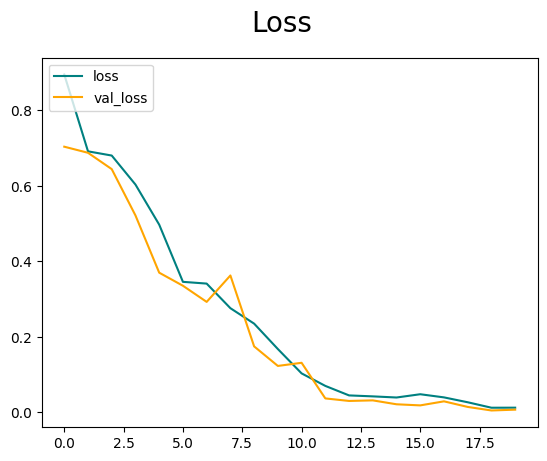

In [106]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

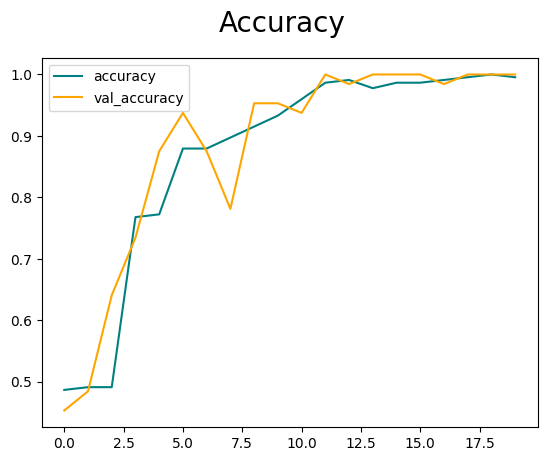

In [107]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 9. Evaluate

In [108]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [109]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [110]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


In [111]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


# 10. Test

In [112]:
import cv2

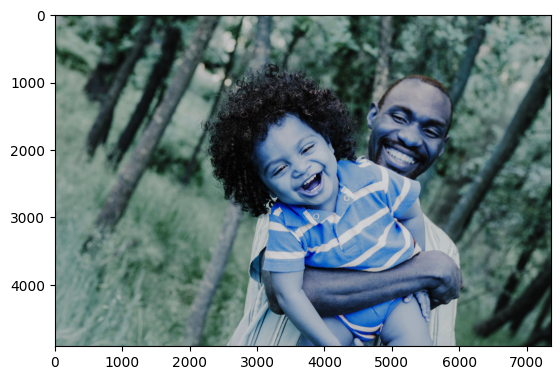

In [128]:
img = cv2.imread('7Y57w0983emdERAoQylUHIGkoEk1cIFvPkXDbeA2lVA.jpg')
plt.imshow(img)
plt.show()

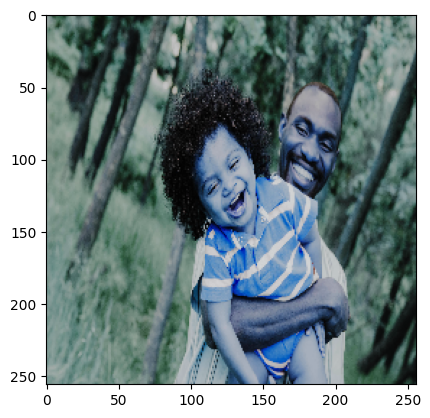

In [129]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [130]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


In [131]:
yhat

array([[0.0152397]], dtype=float32)

In [132]:
if yhat > 0.5:
    print('Predicted class is Sad')
else:
    print('Predicted class is Happy')



Predicted class is Happy


# 11. Save the Model

In [49]:
from tensorflow.keras.models import load_model

In [58]:
model.save(os.path.join('models','imageclassifiernewversion.keras'))

In [59]:
new_model = load_model('imageclassifiernewversion.h5')

FileNotFoundError: [Errno 2] Unable to synchronously open file (unable to open file: name = 'imageclassifiernewversion.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [57]:
new_model.predict(np.expand_dims(resize/255, 0))

NameError: name 'new_model' is not defined